In [ ]:
import pandas as pd
import numpy as np

import platform 
from matplotlib import font_manager, rc
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown System... sorry~~~~')

In [ ]:
from konlpy.tag import Hannanum
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import re
from konlpy.tag import Okt
import nltk
import seaborn as sns

In [ ]:
wanted_de = pd.read_csv("./Data/wanted_de.csv")
wanted_da = pd.read_csv("./Data/wanted_da.csv")
wanted_ds = pd.read_csv("./Data/wanted_ds.csv")

# DE 우대사항

In [ ]:
wanted_de_df = wanted_de.copy()
wanted_ds_df = wanted_ds.copy()
wanted_da_df = wanted_da.copy()

In [ ]:
wanted_de_eng = wanted_de_df['우대사항'].str.replace("[^A-z\s]", "")
wanted_de_df['우대사항_eng']=wanted_de_eng

wanted_de_df = wanted_de_df[wanted_de_df['우대사항_eng'].apply(lambda x : re.sub('[^A-z]', '', x)) != '' ]

noun_eng = []
for row in wanted_de_df["우대사항_eng"]:
    datas = nltk.word_tokenize(row)
    for data in datas:
        if len(data) >= 2:
            noun_eng.append(data)
            
count_eng = Counter(noun_eng)
words_dict_eng = dict(count_eng)

words_eng_df = pd.DataFrame(words_dict_eng, index =[0])
words_eng_df = np.transpose(words_eng_df)

words_eng_df['빈도'] = words_eng_df[words_eng_df[0] >= 5]
words_eng_df.sort_values(by='빈도',ascending=False)
내
final_eng_df = words_eng_df.sort_values(by='빈도',ascending=False).dropna(0)

C:\Users\AMD3600\AppData\Local\Temp/ipykernel_54216/1162548172.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  wanted_de_eng = wanted_de_df['우대사항'].str.replace("[^A-z\s]", "")
C:\Users\AMD3600\AppData\Local\Temp/ipykernel_54216/1162548172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wanted_de_df['우대사항_eng']=wanted_de_eng
C:\Users\AMD3600\AppData\Local\Temp/ipykernel_54216/1162548172.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  final_eng_df = words_eng_df.sort_values(by='빈도',ascending=False).dropna(0)


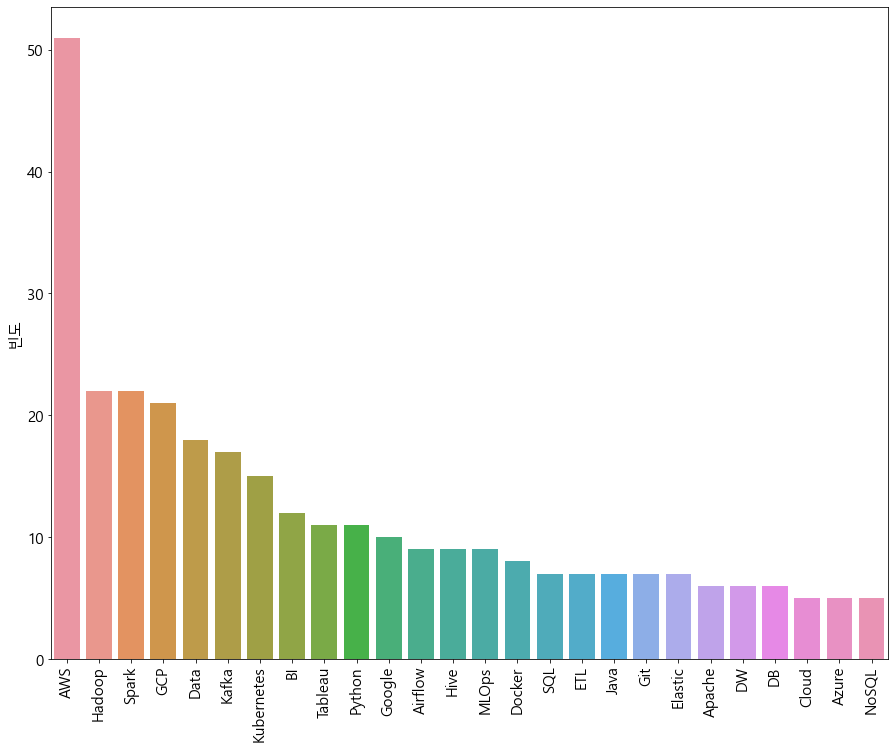

In [ ]:
plt.figure(figsize=(15,12))

sns.barplot(data = final_eng_df,x=final_eng_df.index, y=final_eng_df['빈도'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.ylabel("빈도", fontsize=15)

plt.show()

In [ ]:
wordcloud_kor = WordCloud(
    font_path="c:/Windows/Fonts/malgun.ttf",
    background_color='white',
    width=500, height=500
).generate_from_frequencies(final_eng_df['빈도'])

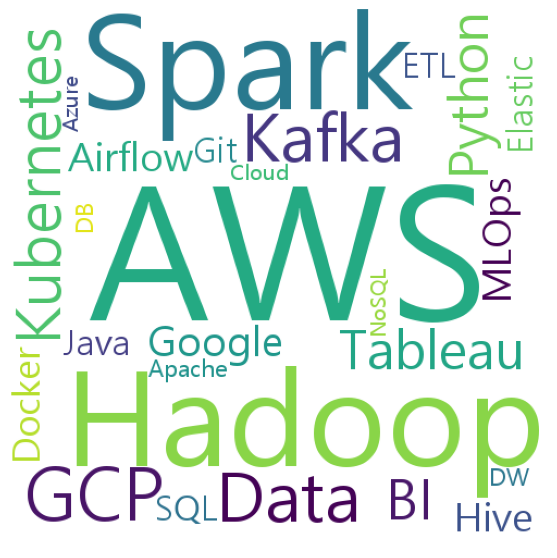

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_kor)
plt.axis('off') # 틱 안보이게 하기
plt.show()

# DS 자격요건

In [ ]:
wanted_ds_eng = wanted_ds_df['자격요건'].str.replace("[^A-z\s]", "")
wanted_ds_df['자격요건_eng']=wanted_ds_eng

wanted_ds_df = wanted_ds_df[wanted_ds_df['자격요건_eng'].apply(lambda x : re.sub('[^A-z]', '', x)) != '' ]

noun_eng = []
for row in wanted_ds_df["자격요건_eng"]:
    datas = nltk.word_tokenize(row)
    for data in datas:
        if len(data) >= 2:
            noun_eng.append(data)
            
count_eng = Counter(noun_eng)
words_dict_eng = dict(count_eng)

words_eng_df = pd.DataFrame(words_dict_eng, index =[0])
words_eng_df = np.transpose(words_eng_df)

words_eng_df['빈도'] = words_eng_df[words_eng_df[0] >= 3]
words_eng_df.sort_values(by='빈도',ascending=False)

final_eng_df = words_eng_df.sort_values(by='빈도',ascending=False).dropna(0)

C:\Users\AMD3600\AppData\Local\Temp/ipykernel_54216/1604066079.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  wanted_ds_eng = wanted_ds_df['자격요건'].str.replace("[^A-z\s]", "")
C:\Users\AMD3600\AppData\Local\Temp/ipykernel_54216/1604066079.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  final_eng_df = words_eng_df.sort_values(by='빈도',ascending=False).dropna(0)


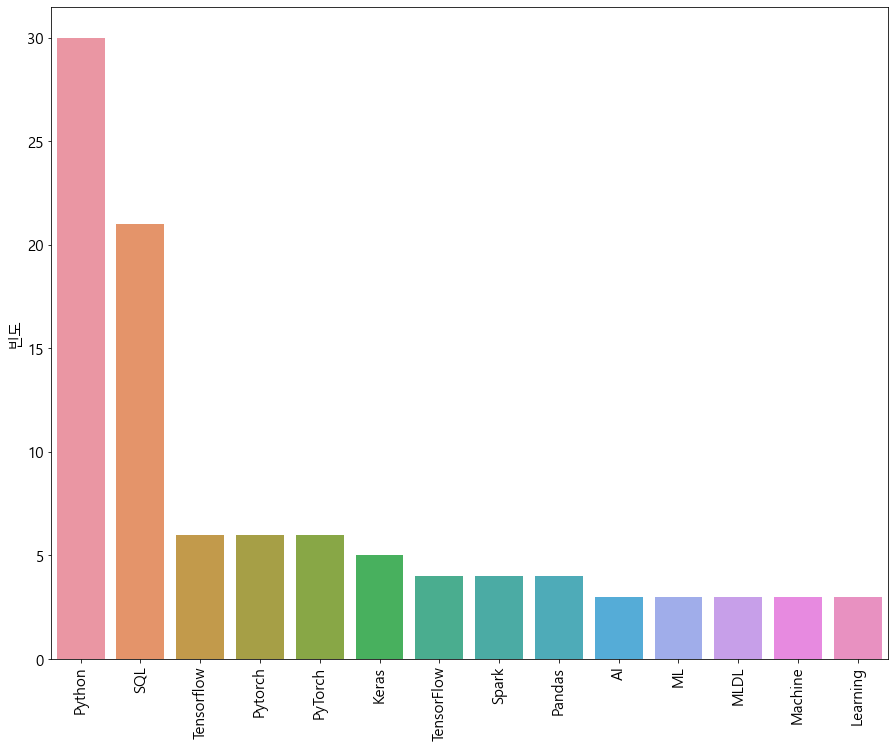

In [ ]:
plt.figure(figsize=(15,12))

sns.barplot(data = final_eng_df,x=final_eng_df.index, y=final_eng_df['빈도'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.ylabel("빈도", fontsize=15)

plt.show()

In [ ]:
wordcloud_kor = WordCloud(
    font_path="c:/Windows/Fonts/malgun.ttf",
    background_color='white',
    width=500, height=500
).generate_from_frequencies(final_eng_df['빈도'])

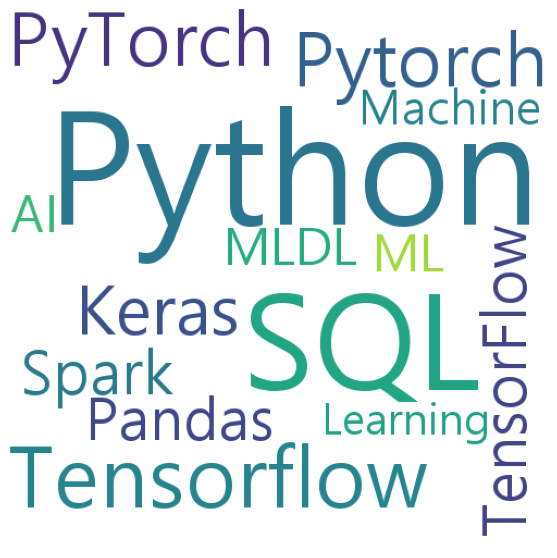

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_kor)
plt.axis('off') # 틱 안보이게 하기
plt.show()

# DS 우대사항

In [ ]:
wanted_ds_eng = wanted_ds_df['우대사항'].str.replace("[^A-z\s]", "")
wanted_ds_df['우대사항_eng']=wanted_ds_eng

wanted_ds_df = wanted_ds_df[wanted_ds_df['우대사항_eng'].apply(lambda x : re.sub('[^A-z]', '', x)) != '' ]

noun_eng = []
for row in wanted_ds_df["우대사항_eng"]:
    datas = nltk.word_tokenize(row)
    for data in datas:
        if len(data) >= 2:
            noun_eng.append(data)
            
count_eng = Counter(noun_eng)
words_dict_eng = dict(count_eng)

words_eng_df = pd.DataFrame(words_dict_eng, index =[0])
words_eng_df = np.transpose(words_eng_df)

words_eng_df['빈도'] = words_eng_df[words_eng_df[0] >= 3]
words_eng_df.sort_values(by='빈도',ascending=False)

final_eng_df = words_eng_df.sort_values(by='빈도',ascending=False).dropna(0)

C:\Users\AMD3600\AppData\Local\Temp/ipykernel_54216/934699532.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  wanted_ds_eng = wanted_ds_df['우대사항'].str.replace("[^A-z\s]", "")
C:\Users\AMD3600\AppData\Local\Temp/ipykernel_54216/934699532.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  final_eng_df = words_eng_df.sort_values(by='빈도',ascending=False).dropna(0)


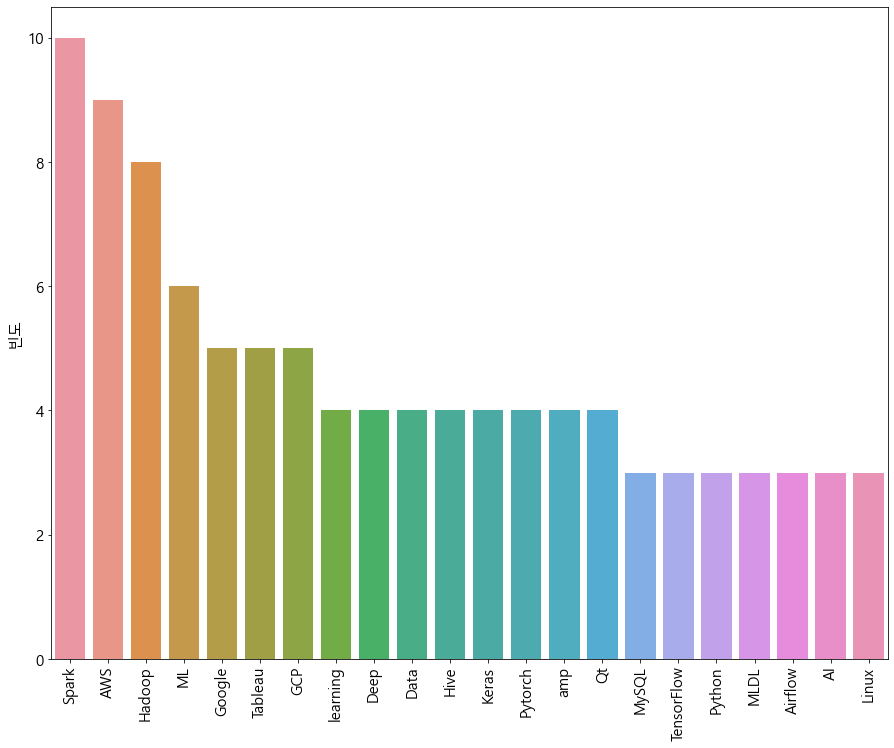

In [ ]:
plt.figure(figsize=(15,12))

sns.barplot(data = final_eng_df,x=final_eng_df.index, y=final_eng_df['빈도'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.ylabel("빈도", fontsize=15)

plt.show()

In [ ]:
wordcloud_kor = WordCloud(
    font_path="c:/Windows/Fonts/malgun.ttf",
    background_color='white',
    width=500, height=500
).generate_from_frequencies(final_eng_df['빈도'])

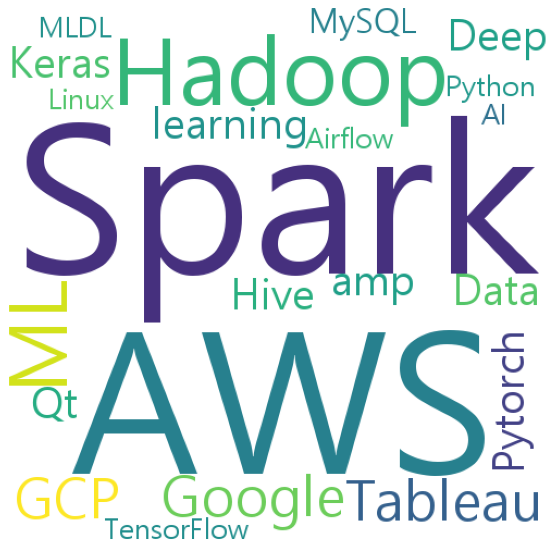

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_kor)
plt.axis('off') # 틱 안보이게 하기
plt.show()

# DA 자격요건

In [ ]:
wanted_da_eng = wanted_da_df['자격요건'].str.replace("[^A-z\s]", "")
wanted_da_df['자격요건_eng']=wanted_da_eng

wanted_da_df = wanted_da_df[wanted_da_df['자격요건_eng'].apply(lambda x : re.sub('[^A-z]', '', x)) != '' ]

noun_eng = []
for row in wanted_da_df["자격요건_eng"]:
    datas = nltk.word_tokenize(row)
    for data in datas:
        if len(data) >= 2:
            noun_eng.append(data)
            
count_eng = Counter(noun_eng)
words_dict_eng = dict(count_eng)

words_eng_df = pd.DataFrame(words_dict_eng, index =[0])
words_eng_df = np.transpose(words_eng_df)

words_eng_df['빈도'] = words_eng_df[words_eng_df[0] >= 3]
words_eng_df.sort_values(by='빈도',ascending=False)

final_eng_df = words_eng_df.sort_values(by='빈도',ascending=False).dropna(0)

C:\Users\AMD3600\AppData\Local\Temp/ipykernel_54216/2838479979.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  wanted_da_eng = wanted_da_df['자격요건'].str.replace("[^A-z\s]", "")
C:\Users\AMD3600\AppData\Local\Temp/ipykernel_54216/2838479979.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  final_eng_df = words_eng_df.sort_values(by='빈도',ascending=False).dropna(0)


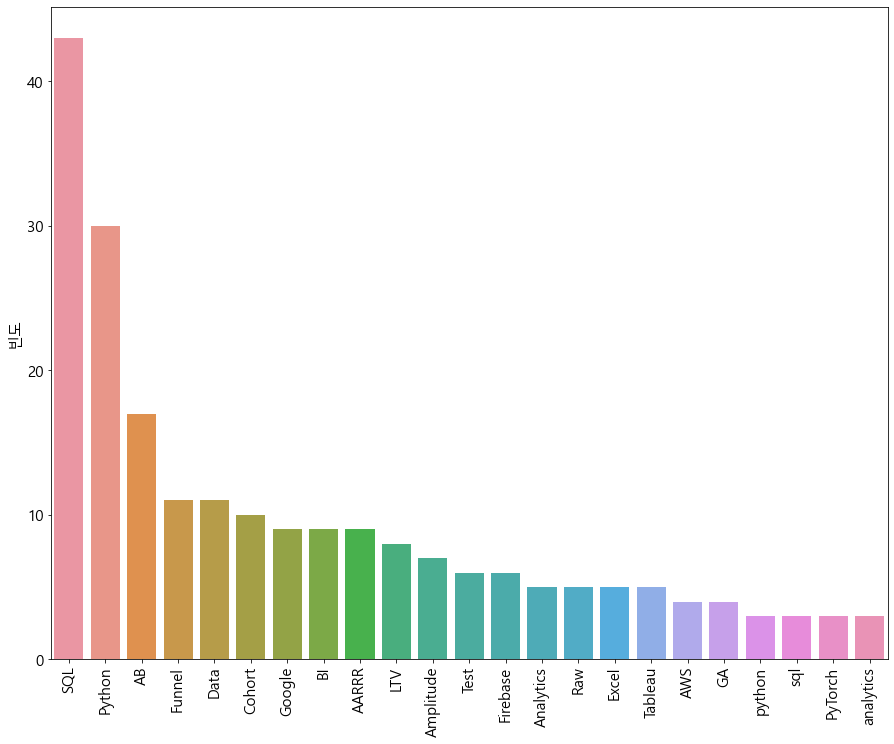

In [ ]:
plt.figure(figsize=(15,12))

sns.barplot(data = final_eng_df,x=final_eng_df.index, y=final_eng_df['빈도'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.ylabel("빈도", fontsize=15)

plt.show()

In [ ]:
wordcloud_kor = WordCloud(
    font_path="c:/Windows/Fonts/malgun.ttf",
    background_color='white',
    width=500, height=500
).generate_from_frequencies(final_eng_df['빈도'])

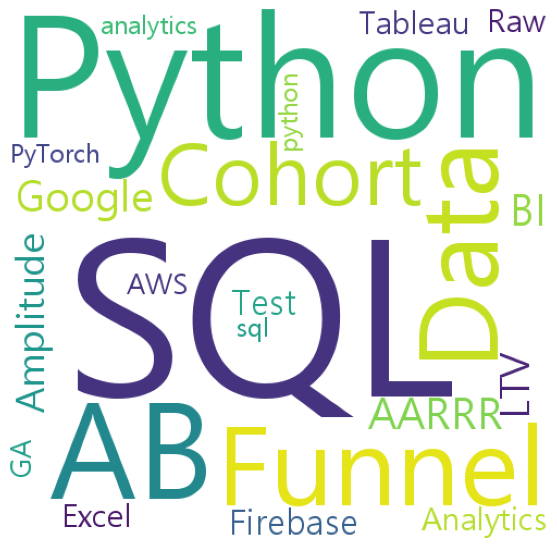

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_kor)
plt.axis('off') # 틱 안보이게 하기
plt.show()

# DA 우대사항

In [ ]:
wanted_da_eng = wanted_da_df['우대사항'].str.replace("[^A-z\s]", "")
wanted_da_df['우대사항_eng']=wanted_da_eng

wanted_da_df = wanted_da_df[wanted_da_df['우대사항_eng'].apply(lambda x : re.sub('[^A-z]', '', x)) != '' ]

noun_eng = []
for row in wanted_da_df["우대사항_eng"]:
    datas = nltk.word_tokenize(row)
    for data in datas:
        if len(data) >= 2:
            noun_eng.append(data)
            
count_eng = Counter(noun_eng)
words_dict_eng = dict(count_eng)

words_eng_df = pd.DataFrame(words_dict_eng, index =[0])
words_eng_df = np.transpose(words_eng_df)

words_eng_df['빈도'] = words_eng_df[words_eng_df[0] >= 3]
words_eng_df.sort_values(by='빈도',ascending=False)

final_eng_df = words_eng_df.sort_values(by='빈도',ascending=False).dropna(0)

C:\Users\AMD3600\AppData\Local\Temp/ipykernel_54216/1576027801.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  wanted_da_eng = wanted_da_df['우대사항'].str.replace("[^A-z\s]", "")
C:\Users\AMD3600\AppData\Local\Temp/ipykernel_54216/1576027801.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  final_eng_df = words_eng_df.sort_values(by='빈도',ascending=False).dropna(0)


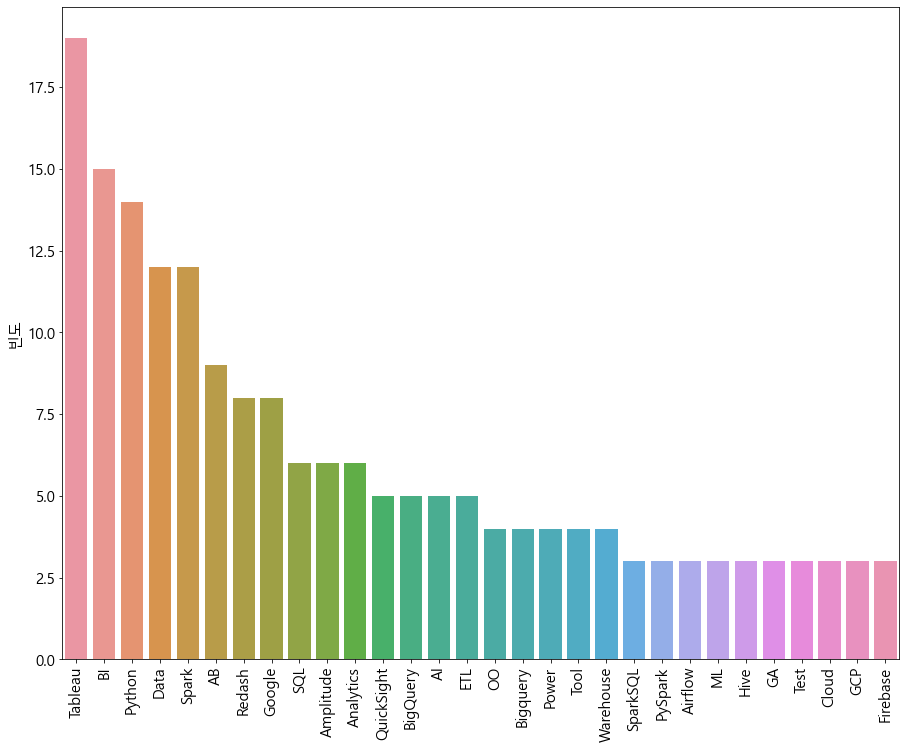

In [ ]:
plt.figure(figsize=(15,12))

sns.barplot(data = final_eng_df,x=final_eng_df.index, y=final_eng_df['빈도'])
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.ylabel("빈도", fontsize=15)

plt.show()

In [ ]:
wordcloud_kor = WordCloud(
    font_path="c:/Windows/Fonts/malgun.ttf",
    background_color='white',
    width=500, height=500
).generate_from_frequencies(final_eng_df['빈도'])

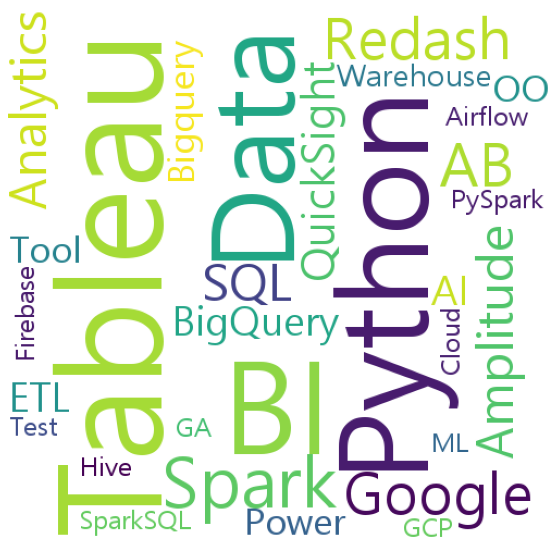

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_kor)
plt.axis('off') # 틱 안보이게 하기
plt.show()